In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from datetime import datetime
from dateutil import tz

In [146]:
# USE MARS INSIGHT PROJECT API TO CREATE DAILY WEATHER REPORT OF MARS 
# Documentation: https://api.nasa.gov/assets/insight/InSight%20Weather%20API%20Documentation.pdf

In [147]:
nasa_api_key = 'DEMO_KEY'
base_url ='https://api.nasa.gov/insight_weather/?'
query_url = f'{base_url}api_key={nasa_api_key}&feedtype=json&ver=1.'

In [148]:
query_url

'https://api.nasa.gov/insight_weather/?api_key=DEMO_KEY&feedtype=json&ver=1.'

In [149]:
nasa_response = requests.get(query_url)
nasa_json=nasa_response.json()

In [150]:
sol_keys=nasa_json["sol_keys"]
print(f'A sol is a Martian day, the data has up to date information on the last {len(sol_keys)} Sols.')

A sol is a Martian day, the data has up to date information on the last 7 Sols.


In [151]:
#since only most recent 7 sol's are avaiable need to make the [sol] dynamic
#dynamic dates
sol_key=nasa_json["sol_keys"]
sol_list=[]
for sol in sol_key:
    sol_list.append(sol)

In [152]:
# Convert Martian date to earth date for all sol articles
date_list=[]

for day in sol_list:
    utc_day=nasa_json[day]['First_UTC']
    utc=datetime.strptime(utc_day, '%Y-%m-%dT%H:%M:%SZ')
    date_formatted=utc.strftime("%d-%b-%Y")
    date_list.append(date_formatted)

In [153]:
# Metrics available for each Sol:
# Each sol has linear averages for Temperature (AT), horizontal wind speed (HWS) and atmostpheric pressure (PRE)
print(f'The Temperature of sol_1 is {nasa_json[sol_list[0]]["AT"]["av"]} F.')
print(f'The average horizontal windspeed of sol_1 is {nasa_json[sol_list[0]]["HWS"]["av"]} m/s.')
print(f'The average atmospheric pressure of sol_1 is {nasa_json[sol_list[0]]["PRE"]["av"]} Pa.')
# There is also a most common wind direction measure
print(f'wind direction: {nasa_json[sol_list[0]]["WD"]["most_common"]["compass_point"]}')

The Temperature of sol_1 is -65.268 F.
The average horizontal windspeed of sol_1 is 4.961 m/s.
The average atmospheric pressure of sol_1 is 657.298 Pa.
wind direction: SW


In [158]:
# iterate through each sol
for i in range(0,7):
    print(f'{date_list[i]}: \n AT: {nasa_json[sol_list[i]]["AT"]["av"]} F \n HWS: {nasa_json[sol_list[i]]["HWS"]["av"]} m/s \n PRE: {nasa_json[sol_list[i]]["PRE"]["av"]} Pa.')

          

08-Apr-2020: 
 AT: -65.268 F 
 HWS: 4.961 m/s 
 PRE: 657.298 Pa.
09-Apr-2020: 
 AT: -58.294 F 
 HWS: 4.865 m/s 
 PRE: 655.392 Pa.
10-Apr-2020: 
 AT: -70.835 F 
 HWS: 4.64 m/s 
 PRE: 662.844 Pa.
11-Apr-2020: 
 AT: -54.566 F 
 HWS: 4.766 m/s 
 PRE: 658.639 Pa.
12-Apr-2020: 
 AT: -60.605 F 
 HWS: 4.757 m/s 
 PRE: 659.311 Pa.
13-Apr-2020: 
 AT: -59.095 F 
 HWS: 4.839 m/s 
 PRE: 660.348 Pa.
14-Apr-2020: 
 AT: -54.007 F 
 HWS: 5.134 m/s 
 PRE: 660.051 Pa.


In [178]:
# Save result into variables for data frame
date_variables = [date_list[i] for i in range(0,7)]
temp_variables = [nasa_json[sol_list[i]]["AT"]["av"] for i in range(0,7)]
HWS_variables = [nasa_json[sol_list[i]]["HWS"]["av"] for i in range(0,7)]
PRE_variables = [nasa_json[sol_list[i]]["PRE"]["av"] for i in range(0,7)]

In [182]:

mars_df=pd.DataFrame({'Date': date_variables,
                        'Average Temp':temp_variables,
                        'Horizontal Wind Speed':HWS_variables,
                         'Pressure':PRE_variables
                        })
mars_df

,Date,Average Temp,Horizontal Wind Speed,Pressure
0,08-Apr-2020,-65.268,4.961,657.298
1,09-Apr-2020,-58.294,4.865,655.392
2,10-Apr-2020,-70.835,4.640,662.844
3,11-Apr-2020,-54.566,4.766,658.639
4,12-Apr-2020,-60.605,4.757,659.311
5,13-Apr-2020,-59.095,4.839,660.348
6,14-Apr-2020,-54.007,5.134,660.051


In [184]:
# Export the mars data into a .csv.
mars_df.to_csv('Resources/mars.csv', encoding='utf-8',index=False)

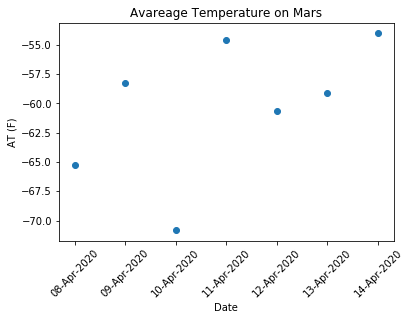

In [208]:
plt.scatter(mars_df['Date'],mars_df['Average Temp'])
plt.title('Avareage Temperature on Mars')
plt.xlabel('Date')
plt.ylabel('AT (F)')
plt.xticks(rotation=45) 
plt.savefig('Resources/AT.png')

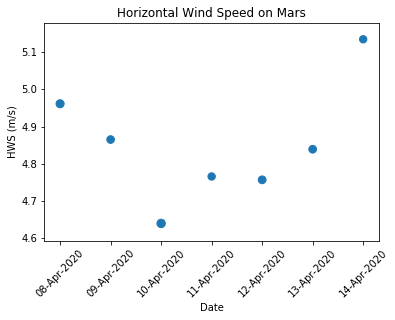

In [206]:
s=abs(mars_df['Average Temp'])
plt.scatter(mars_df['Date'],mars_df['Horizontal Wind Speed'], s=s)
plt.title('Horizontal Wind Speed on Mars')
plt.xlabel('Date')
plt.ylabel('HWS (m/s)')
plt.xticks(rotation=45) 
plt.savefig('Resources/HWS.png')

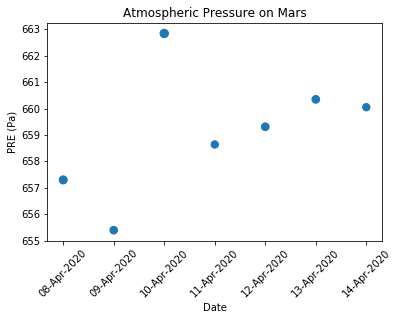

In [207]:
plt.scatter(mars_df['Date'],mars_df['Pressure'], s=s)
plt.title('Atmospheric Pressure on Mars')
plt.xlabel('Date')
plt.ylabel('PRE (Pa)')
plt.xticks(rotation=45) 
plt.savefig('Resources/Pressure.png')